# Sumário
* [Entendimento do Problema](#entendimento_problema)
* [Entendimento dos Dados](#entendimento_dados)
* [Preparação dos Dados](#preparação_dados)
* [Modelagem](#modelagem)
* [Avaliação](#avaliação)
* [Conclusão](#conclusão)

# Entendimento do Problema <a class="anchor" id="entendimento_problema"></a>

O desafio do Reconhecedor de Dígito (Digit Recognizer) do [Kaggle](https://www.kaggle.com/c/digit-recognizer/overview) é um ótimo desafio para quem é novo na área de Machine Learning e Visão Computacional. Este desafio consiste em identificar a que algarismo corresponde uma determinada imagem.

Neste notebook será feito um estudo dos dados e a construção de um modelo para realizar o reconhecimento de dígitos escritos à mão. Este é um dos problemas clássicos que são resolvidos através de técnicas de machine learning. Para realizar esta tarefa, foi implementada uma Rede Neural Artificial utilizando a biblioteca Keras, que possui uma forma bastante simples e intuitiva de construir, treinar e avaliar um modelo.

# Entendimento dos Dados <a class="anchor" id="entendimento_dados"></a>

#### Importando as bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import pandas as pd
from sklearn.metrics import confusion_matrix

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


#### Obtenção dos Dados

Os dados encontram-se disponibilizados no [Kaggle](https://www.kaggle.com/c/digit-recognizer/data). Nesta competição são disponibilizados três arquivos: 'train.csv', 'test.csv' e 'sample_submission.csv'. O primeiro arquivo contém os dados que serão utilizados no treinamento no modelo, o segundo arquivo contém os dados que serão utilizados na etapa de teste do modelo e o último contém um exemplo de como deve ser o arquivo enviado ao Kaggle.

Porém, este mesmo conjunto de dados pode ser obtido diretamente através da biblioteca Keras, embora os conjuntos de treino e teste sejam diferentes.

In [2]:
training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
submissao = pd.read_csv('sample_submission.csv')


training_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Abaixo, podemos ver o formato dos nossos dados. O conjunto de teste não possui a coluna 'label', que é o atributo que o nosso modelo irá prever baseado nas demais colunas. Ao todo temos 784 colunas com prefixo 'pixel', que contém o valor de cada pixel da imagem (28x28).

In [3]:
print('Número de atributos no conjunto de treino:', training_set.shape[1])
print('Número de registros no conjunto de treino:', training_set.shape[0])
print('\nNúmero de atributos no conjunto de teste:', test_set.shape[1])
print('Número de registros no conjunto de teste:', test_set.shape[0])

Número de atributos no conjunto de treino: 785
Número de registros no conjunto de treino: 42000

Número de atributos no conjunto de teste: 784
Número de registros no conjunto de teste: 28000


#### Tipos dos atributos

In [4]:
training_set.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

Cada campo dos nossos conjuntos de dados, com exceção da coluna 'label' no conjunto de treinamento, apresenta valores de variam de 0 a 255. Estes valores representam a intensidade dos pixels nas imagens. Quanto mais próximo de 0 for este valor, mais próximo da cor preta será este pixel. Enquanto que, quanto mais próximo de 255 for este valor, mais próximo da cor branca será este pixel, como pode ser visto [aqui](#representação_imagem).

#### Exploração dos Dados

In [5]:
# Distribuição estatística dos dados
training_set.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Para fazer a exibição dessas imagens é necessário primeiro converter esses 784 pixels em uma matriz 28x28. Abaixo é possível ver algumas das imagens que serão utilizadas nas etapas de treinamento e validação do modelo.

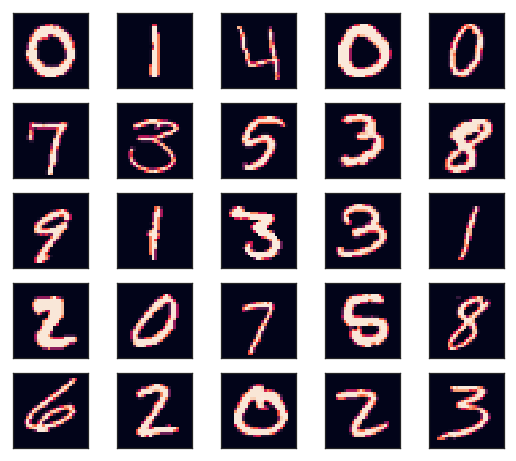

In [6]:
fig=plt.figure(figsize=(9, 8))
linhas = 5
colunas = 5

for i in range(1, linhas*colunas + 1):
    
    img = training_set.loc[i].values[1:].reshape((28, 28))
    fig.add_subplot(linhas, colunas, i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

<a class="anchor" id="representação_imagem"></a>
Abaixo podemos ver a representação matricial de uma imagem do dígito 7.

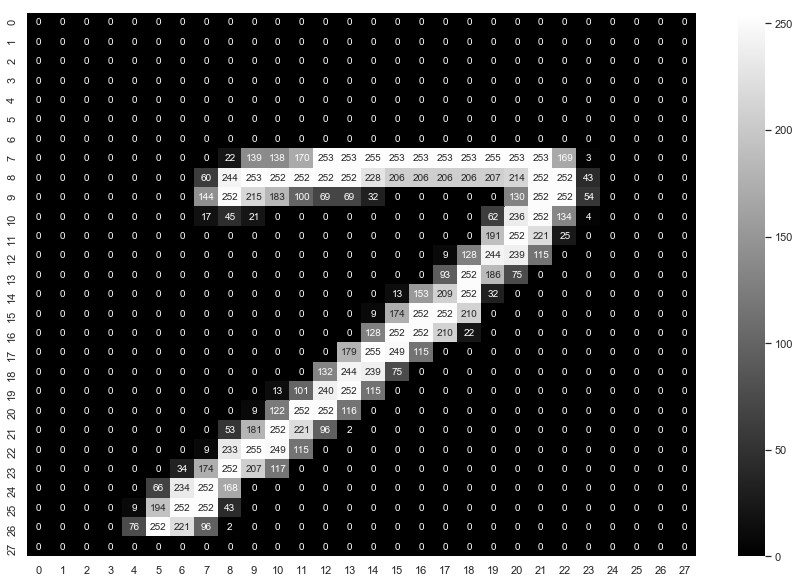

In [7]:
test = test_set.to_numpy().reshape(test_set.shape[0], 28,28,1)
plt.figure(figsize=(15,10))
sns.heatmap(test[30].reshape(28,28), annot=True, cmap="gray", fmt="d")
plt.show()

Abaixo podemos ver a distribuição das labels (classes) no conjunto de treinamento. 

Antes de construir o modelo, é preciso analisar a distribuição de classes dentro do conjunto de treinamento. É necessário que as classes estejam balanceadas para evitar que o modelo fique tendencioso a classificar uma nova observação como sendo pertencente à classe mais predominante no conjunto de treinamento.

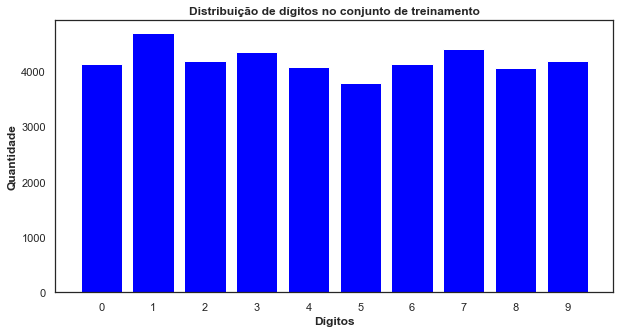

In [8]:
labels = training_set[['label']]
label, quantidade =  np.unique(labels, return_counts=True)

plt.figure(figsize=(10,5))
plt.bar(label, quantidade, color='blue')
plt.xticks(label)
plt.title('Distribuição de dígitos no conjunto de treinamento', fontweight='bold')
plt.xlabel('Dígitos', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.show()

Pela análise do gráfico, notamos que existe um certo balanceamento entre as classes no conjunto de treinamento. Logo, podemos prosseguir.

# Preparação dos Dados <a class="anchor" id="preparação_dados"></a>

Antes de iniciar a modelagem é necessário separar o 'target' (coluna label) do conjunto de treinamento.

In [9]:
x_train = training_set.loc[:, training_set.columns != 'label']
y_train = training_set[['label']]

x_test = test_set

Aqui é feia a normalização dos dados. Esta normalização é necessária a fim de diminuir o efeito da diferença de luminosidade entre as imagens e também porque a rede neural converge mais rápido quando se trabalha com valores entre 0 e 1.

In [10]:
x_train = x_train / 255
x_test = x_test / 255

Em seguida, é necessário transformar os dados (em formato tabular) em um array, de modo que possa ser aplicável à rede neural. Após essa transformação, cada imagem passou a ser representada por um array de dimensão 28x28.

In [11]:
aux = np.array(x_train)
x_train = aux.reshape(-1, 28, 28)

aux = np.array(x_test)
x_test = aux.reshape(-1, 28, 28)

# Modelagem <a class="anchor" id="modelagem"></a>

A rede neural escolhida possui a seguinte arquitetura: 784 entradas (dimensão da imagem: 28x28x1), 256 neurônios na camada intermediária e 10 neurônios na camada de saída, representando cada uma das 10 classes (dígitos de 0 a 9).

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Para compilar o modelo, o otimizador escolhido foi o Adam (com os valores default). Quanto à métrica utilizada para avaliar o modelo, foi escolhida a 'accuracy', que representa a porcentagem de imagens que foram classificadas corretamente pelo modelo. Ao final de 10 épocas, o modelo obteve uma precisão em cima do conjunto de treinamento de 0.9965 ou seja, 99.65% das imagens foram classificadas corretamente pelo modelo durante o treinamento. 

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 64us/sample - loss: 0.2611 - accuracy: 0.9242
Epoch 2/10
42000/42000 [==============================] - 2s 53us/sample - loss: 0.1086 - accuracy: 0.9675
Epoch 3/10
42000/42000 [==============================] - 2s 55us/sample - loss: 0.0725 - accuracy: 0.9779
Epoch 4/10
42000/42000 [==============================] - 2s 56us/sample - loss: 0.0503 - accuracy: 0.9842
Epoch 5/10
42000/42000 [==============================] - 2s 53us/sample - loss: 0.0361 - accuracy: 0.9892
Epoch 6/10
42000/42000 [==============================] - 2s 52us/sample - loss: 0.0278 - accuracy: 0.9912
Epoch 7/10
42000/42000 [==============================] - 2s 52us/sample - loss: 0.0215 - accuracy: 0.9935
Epoch 8/10
42000/42000 [==============================] - 2s 55us/sample - loss: 0.0168 - accuracy: 0.9944
Epoch 9/10
42000/42000 [==============================] - 2s 52us/sample - loss: 0.0144 - accuracy: 0.9956
Epoch 10/10
42

Outra forma bastante útil de ver com o modelo está se comportando é através da Matriz de Confusão. Nela podemos ver que, durante o treinamento da rede, o nosso modelo falhou cinco vezes em prever o dígito 9, classificando-o como dígito 7. O mesmo ocorreu com o dígito 1, que erroneamente foi classificado como dígito 8 cinco vezes. Mas estes são casos isolados, uma vez que a grande maioria das previsões foi feita corretamente.

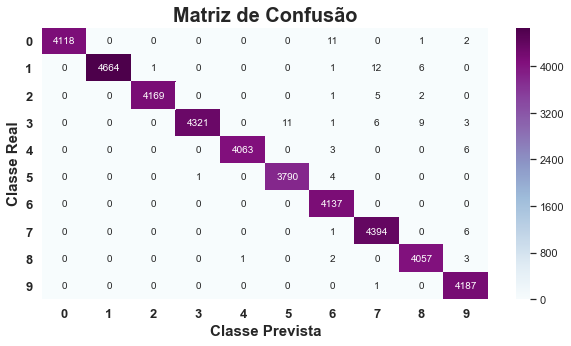

In [14]:
y_train_pred = model.predict(x_train)
y_pred_classes = np.argmax(y_train_pred,axis = 1) 
confusion_mtx = confusion_matrix(y_train, y_pred_classes) 

plt.figure(figsize=(10,5))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="BuPu")
ax.set_ylim(10, 0)
plt.xticks(fontweight='bold', fontsize=13)
plt.yticks(rotation=0, fontweight='bold', fontsize=13)
plt.xlabel('Classe Prevista', fontweight='bold', fontsize=15)
plt.ylabel('Classe Real', fontweight='bold', fontsize=15)
plt.title('Matriz de Confusão', fontweight='bold', fontsize=20)
plt.show()

# Avaliação <a class="anchor" id="avaliação"></a>

Para fazer a avaliação do modelo em cima do conjunto de testes, primeiro precisamos prever as classes a que cada imagem pertence. Em seguida, será gerado um arquivo csv contendo o ID da imagem e seu respectivo label. Por fim, este arquivo será submetido ao [Kaggle](https://www.kaggle.com) e o score do modelo obtido.

In [15]:
predict = np.argmax(model.predict(x_test), axis=1)
predict

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [16]:
submissao['Label'] = predict
submissao.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [17]:
submissao.to_csv('./submissao.csv', index=False)

Como visto na imagem abaixo, após ser feita a submissão no [Kaggle](https://www.kaggle.com) obtivemos um score de 97.68%, que é um resultado muito bom, apesar de possuir cerca de 2% de precisão a menos se comparado com o resultado obtido em cima do conjunto de treinamento.

![](Imagens/Dígitos/Digitos-Modelo1.PNG)

Porém este resultado ainda pode ser melhor. Talvez alterando a arquitetura da rede neural, ou modificando parâmetros como taxa de aprendizado, quantidade de épocas, função de ativação, otimizador, entre outros, resulte em um score mais alto do que o obtido no modelo acima. Uma outra possível solução seria, ao invés de utilizar uma rede neural do tipo mlp, utilizar uma CNN (Convolutional Neural Network). Ao meu ver, considerando a natureza do problema, é "um canhão para matar uma formiga", mas que pode sim trazer melhores resultados.

# Conclusão <a class="anchor" id="conclusão"></a>

Através da análise realizada em cima dos dados disponibilizados nesta competição do [Kaggle](https://www.kaggle.com/c/digit-recognizer/overview), foi possível ver o quão simples é implementar uma rede neural do tipo mlp (Multilayer Perceptron) utilizando a biblioteca Keras. Além disso, a baixa complexidade do problema contribuiu para que os resultados obtidos fossem muito bons, uma vez que as imagens possuem uma baixa dimensão, além de possuírem apenas um canal de cores.